<a href="https://colab.research.google.com/github/hyeseung91/ML_learning/blob/master/ATE_ML_fine_dust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

     |████████████████████████████████| 14.7MB 302kB/s 
     |████████████████████████████████| 962kB 40.5MB/s 
     |████████████████████████████████| 1.6MB 45.2MB/s 
     |████████████████████████████████| 235kB 46.4MB/s 
     |████████████████████████████████| 10.9MB 43.0MB/s 
     |████████████████████████████████| 552kB 34.0MB/s 
  Created wheel for qeds: filename=qeds-0.6.2-cp36-none-any.whl size=27820 sha256=08206e1a7042663090dac34731c1d2fce7fe25a3433f1beeab0eb7f0e7bc17ae
  Stored in directory: /root/.cache/pip/wheels/b7/0b/74/c09109813c2b6116a2d4f2833c354b24163672f846a50fc7b4
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=cae61ef50c304d983763854729b1b3a8efa0c774244aeade4742264c877d9182
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=53f2027530dc5a949a031677173044bc520e819de3504537666ed2d396

In [ ]:
import pandas as pd
import numpy as np
import patsy
from sklearn import linear_model, ensemble, base, neural_network
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_path="/content/drive/My Drive/ML/KCYPS2010-m1e4e1_new.dta"
df=pd.read_stata(df_path)
df.describe()

,id,year,panel,gender,age,school_loc,ind_loc,school,grade,coeduw,f_edu,m_edu,health,exercise_time,ego_resilience1,ego_resilience2,ego_resilience3,ego_resilience4,ego_resilience5,ego_resilience6,ego_resilience7,ego_resilience8,ego_resilience9,ego_resilience10,ego_resilience11,ego_resilience12,ego_resilience13,ego_resilience14,satisfaction1,satisfaction2,satisfaction3,homework1_time1,homework1_time2,homework1_time3,homework1_time4,homework2_time1,homework2_time2,homework2_time3,homework2_time4,homework3_time1,...,pm10_bad,pm25,pm25_verybad,pm25_bad,temp_avg,temp_min,temp_max,rainfall,wind_max,wind_avg,m_study,f_study,female,exercise_time1,loc_yr,homework1_time,homework2_time,homework3_time,withfriend_time,satisfaction,aggressive,symptom_phy,depression,ego_resilience,social_cohesion,move,income,aggressive_p1,depression_p1,symptom_phy_p1,ego_resilience_p1,aggressive_p2,depression_p2,symptom_phy_p2,ego_resilience_p2,satisfaction_p3,aggressive_p3,depression_p3,symptom_phy_p3,ego_resilience_p3
count,25468.000000,25468.000000,25468.000000,25013.000000,25093.000000,19490.000000,25468.000000,25010.000000,25033.000000,13073.000000,24328.000000,24536.000000,25004.000000,25008.000000,13182.000000,13181.000000,13182.000000,13182.000000,13181.000000,13182.000000,13182.000000,13182.000000,13182.000000,13181.000000,13181.000000,13181.000000,13181.000000,13180.000000,23472.000000,23474.000000,23474.000000,24832.000000,24832.000000,24880.000000,24880.000000,24778.000000,24778.000000,24802.000000,24802.000000,24884.000000,...,25468.000000,5702.000000,25468.0,25468.00000,24891.000000,24891.000000,24891.000000,24891.000000,24891.000000,24891.000000,25468.000000,25468.000000,25468.000000,25008.000000,25468.000000,24739.000000,24636.000000,24786.000000,24764.000000,23569.000000,16308.000000,16308.000000,16308.000000,13460.000000,24993.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000
mean,87913.105623,2012.853760,2.117952,1.467397,13.397601,2741.557414,2746.313570,1.862015,2.972636,2.451771,2.884865,2.698769,3.281715,2.913988,3.074040,3.036871,3.082385,3.043013,2.948866,3.035958,2.682749,2.949325,2.829237,3.037933,2.803657,2.780821,2.958197,3.173976,3.287960,2.791088,3.238434,0.427150,12.297922,0.427653,8.462379,0.483857,8.254702,0.473430,5.805338,0.847452,...,0.317496,27.665749,0.0,0.03204,8.513905,3.960305,13.723699,1.948080,7.314519,1.880025,13.040051,13.441613,0.459047,1.913988,272.760803,0.596345,0.588210,1.027680,1.457129,0.001044,-0.000357,-0.000072,-0.001104,0.001772,0.000948,0.072444,4.713395,0.000290,-0.000158,0.000303,0.000600,0.000287,-0.000162,0.000298,0.000604,0.000726,0.000284,-0.000162,0.000298,0.000603
std,50006.514034,1.921218,0.757773,0.498946,2.308522,894.825103,895.389902,0.762092,1.736361,0.780727,1.789775,1.580844,0.593584,1.264765,0.650978,0.696299,0.771551,0.659711,0.868586,0.752759,0.917145,0.789322,0.789537,0.768452,0.811332,0.810767,0.776063,0.686779,0.682429,0.883672,0.724015,0.655464,14.657259,0.743685,13.559300,0.749488,13.700982,0.851854,12.110255,1.186044,...,0.465512,5.971624,0.0,0.17611,2.858378,3.432631,2.750279,3.439408,2.171004,1.027465,3.835263,4.485485,0.498330,1.264866,147.699905,0.581916,0.729371,1.254045,1.310003,0.890658,0.890302,0.914353,0.940720,0.926650,0.890123,0.259226,2.632188,0.047453,0.058434,0.045313,0.070305,0.047391,0.058327,0.045203,0.070110,0.055151,0.047342,0.058376,0.045279,0.070275
min,14201.000000,2010.000000,1.000000,1.000000,9.000000,-9.000000,1001.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,17.952168,0.0,0.00000,0.066667,-5.644444,5.533333,0.000000,2.666667,0.266667,0.

In [ ]:
#set to panel data format
data = df
year=pd.Categorical(data.year)
data=data.set_index(['id','year'])
data['year']= year

from linearmodels import PanelOLS
mod = PanelOLS.from_formula('health ~ pm10_bad + income + f_study + m_study + temp_avg + rainfall + wind_avg',
                            data=data)
mod.fit(cov_type='clustered', cluster_entity=True)

/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,health,R-squared:,0.9338
Estimator:,PanelOLS,R-squared (Between):,0.9582
No. Observations:,24472,R-squared (Within):,-0.5772
Date:,"Mon, Jul 13 2020",R-squared (Overall):,0.9338
Time:,14:34:41,Log-likelihood,-3.097e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,4.927e+04
Entities:,4182,P-value,0.0000
Avg Obs:,5.8517,Distribution:,"F(7,24465)"
Min Obs:,1.0000,,
Max Obs:,17.000,F-statistic (robust):,1.741e+04


In [ ]:
pip install linearmodels

     |████████████████████████████████| 1.5MB 2.7MB/s 


In [ ]:
pip install econtools

     |████████████████████████████████| 542kB 2.8MB/s 


In [ ]:
import econtools
import econtools.metrics as mt

result=mt.reg(df,'health',['pm10','income', 'f_study', 'm_study', 'temp_avg', 'rainfall', 'wind_avg'], fe_name='id',cluster='ind_loc')
print(result.summary)


             coeff        se         t       p>t    CI_low   CI_high
pm10     -0.001509  0.000802 -1.880043  0.062677 -0.003098  0.000081
income    0.006882  0.003704  1.857893  0.065787 -0.000457  0.014220
f_study   0.001462  0.001820  0.802868  0.423736 -0.002145  0.005068
m_study   0.004012  0.002309  1.737802  0.084970 -0.000562  0.008587
temp_avg -0.000381  0.002072 -0.183939  0.854391 -0.004486  0.003724
rainfall -0.000980  0.001043 -0.939754  0.349348 -0.003045  0.001086
wind_avg  0.013599  0.007647  1.778480  0.078014 -0.001550  0.028748


In [ ]:
def get_treatment_se(fit, cluster_id, rows=None):
    if cluster_id is not None:
        if rows is None:
            rows = [True] * len(cluster_id)
        vcov = sm.stats.sandwich_covariance.cov_cluster(fit, cluster_id.loc[rows])
        return np.sqrt(np.diag(vcov))

    return fit.HC0_se

In [ ]:
formula = """
health ~ pm10_bad +
  income + f_study + m_study + temp_avg + rainfall + wind_avg
"""

health, X = patsy.dmatrices(formula, df, return_type="dataframe")
# some categories are empty after dropping rows will Null, drop now
X = X.loc[:, X.sum() > 0]
health = health.iloc[:, 0]
treatment_variable = "pm10_bad"
treatment = X["pm10_bad"]
Xl = X.drop(["pm10_bad"], axis=1)

loc_id = df.loc[X.index, "ind_loc"].astype("category")

import re
# remove [ ] from names for compatibility with xgboost
Xl = Xl.rename(columns=lambda x: re.sub('\[|\]','_',x))

Correlation in median CATE:


,ElasticNetCV,RandomForestRegressor,XGBRegressor,MLPRegressor
ElasticNetCV,1.000000,0.216512,0.242671,0.443489
RandomForestRegressor,0.216512,1.000000,0.669941,0.121519
XGBRegressor,0.242671,0.669941,1.000000,0.145866
MLPRegressor,0.443489,0.121519,0.145866,1.000000




Best linear projection of CATE


ElasticNetCV  RandomForestRegressor  XGBRegressor  MLPRegressor
blp 0     -0.035365              -0.031567     -0.034081     -0.030112
    1      0.864693               0.315242      0.258017      0.544786
se  0      0.015594               0.014123      0.014253      0.014643
    1      0.428536               0.106751      0.089396      1.428233



Group average treatment effects:


ElasticNetCV  RandomForestRegressor  XGBRegressor  MLPRegressor
gate 0     -0.069456              -0.085751     -0.096520     -0.020888
     1     -0.023442              -0.049996     -0.055348     -0.037739
     2     -0.027770              -0.025683     -0.042791     -0.045621
     3     -0.032070              -0.017281      0.003538     -0.030521
     4     -0.023560               0.035974      0.022182     -0.019150
se   0      0.030815               0.028013      0.027143      0.030405
     1      0.029318               0.028278      0.026251      0.027749
     2      0.029933               0.025414      0.026896      0.027578
     3      0.031090               0.028166      0.028553      0.026818
     4      0.029417               0.030097      0.030045      0.029649

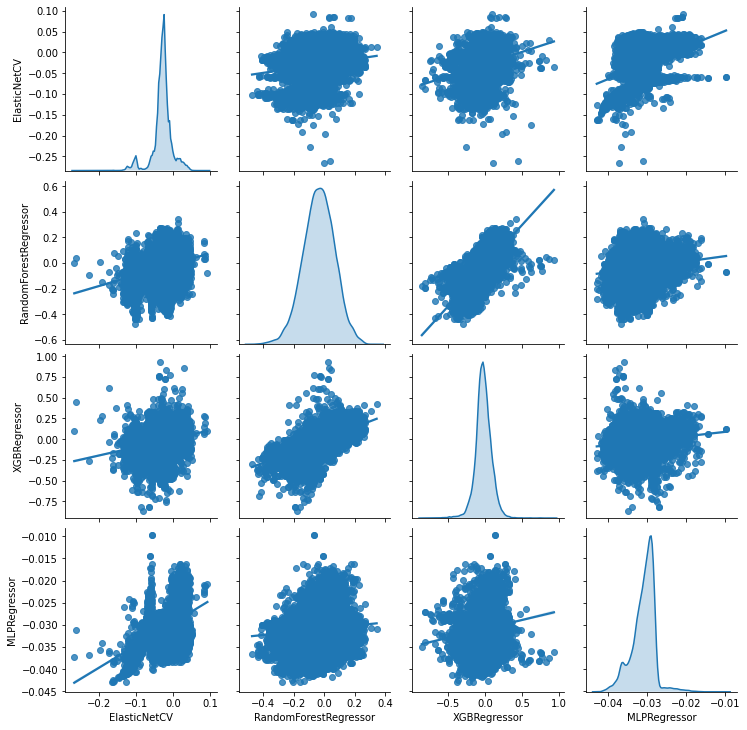

In [ ]:
def generic_ml_model(x, y, treatment, model, n_split=100, n_group=5, cluster_id=None):
    nobs = x.shape[0]

    blp = np.zeros((n_split, 2))
    blp_se = blp.copy()
    gate = np.zeros((n_split, n_group))
    gate_se = gate.copy()

    baseline = np.zeros((nobs, n_split))
    cate = baseline.copy()
    lamb = np.zeros((n_split, 2))

    for i in range(n_split):
        main = np.random.rand(nobs) > 0.5
        rows1 = ~main & (treatment == 1)
        rows0 = ~main & (treatment == 0)

        mod1 = base.clone(model).fit(x.loc[rows1, :], (y.loc[rows1]))
        mod0 = base.clone(model).fit(x.loc[rows0, :], (y.loc[rows0]))

        B = mod0.predict(x)
        S = mod1.predict(x) - B
        baseline[:, i] = B
        cate[:, i] = S
        ES = S.mean()

        ## BLP
        # assume P(treat|x) = P(treat) = mean(treat)
        p = treatment.mean()
        reg_df = pd.DataFrame(dict(
            y=y, B=B, treatment=treatment, S=S, main=main, excess_S=S-ES
        ))
        reg = smf.ols("y ~ B + I(treatment-p) + I((treatment-p)*(S-ES))", data=reg_df.loc[main, :])
        reg_fit = reg.fit()
        blp[i, :] = reg_fit.params.iloc[2:4]
        blp_se[i, :] = get_treatment_se(reg_fit, cluster_id, main)[2:]

        lamb[i, 0] = reg_fit.params.iloc[-1]**2 * S.var()

        ## GATEs
        cutoffs = np.quantile(S, np.linspace(0,1, n_group + 1))
        cutoffs[-1] += 1
        for k in range(n_group):
            reg_df[f"G{k}"] = (cutoffs[k] <= S) & (S < cutoffs[k+1])

        g_form = "y ~ B + " + " + ".join([f"I((treatment-p)*G{k})" for k in range(n_group)])
        g_reg = smf.ols(g_form, data=reg_df.loc[main, :])
        g_fit = g_reg.fit()
        gate[i, :] = g_fit.params.values[2:] #g_fit.params.filter(regex="G").values
        gate_se[i, :] = get_treatment_se(g_fit, cluster_id, main)[2:]

        lamb[i, 1] = (gate[i,:]**2).sum()/n_group

    out = dict(
        gate=gate, gate_se=gate_se,
        blp=blp, blp_se=blp_se,
        Lambda=lamb, baseline=baseline, cate=cate,
        name=type(model).__name__
    )
    return out


def generic_ml_summary(generic_ml_output):
    out = {
        x: np.nanmedian(generic_ml_output[x], axis=0)
        for x in ["blp", "blp_se", "gate", "gate_se", "Lambda"]
    }
    out["name"] = generic_ml_output["name"]
    return out

kw = dict(x=Xl, treatment=treatment, n_split=11, n_group=5, cluster_id=loc_id)

@ignore_warnings(category=ConvergenceWarning)
def evaluate_models(models, y, **other_kw):
    all_kw = kw.copy()
    all_kw["y"] = y
    all_kw.update(other_kw)
    return list(map(lambda x: generic_ml_model(model=x, **all_kw), models))


def generate_report(results):
    summaries = list(map(generic_ml_summary, results))
    df_plot = pd.DataFrame({
        mod["name"]: np.median(mod["cate"], axis=1)
        for mod in results
    })

    print("Correlation in median CATE:")
    display(df_plot.corr())
    sns.pairplot(df_plot, diag_kind="kde", kind="reg")

    print("\n\nBest linear projection of CATE")
    df_cate = pd.concat({
        s["name"]: pd.DataFrame(dict(blp=s["blp"], se=s["blp_se"]))
        for s in summaries
    }).T.stack()
    display(df_cate)

    print("\n\nGroup average treatment effects:")
    df_groups = pd.concat({
        s["name"]: pd.DataFrame(dict(gate=s["gate"], se=s["gate_se"]))
        for s in summaries
    }).T.stack()
    display(df_groups)


import xgboost as xgb
models = [
    linear_model.ElasticNetCV(cv=10, n_alphas=25, max_iter=500, tol=1e-4, n_jobs=1),
    ensemble.RandomForestRegressor(n_estimators=200, min_samples_leaf=20),
    xgb.XGBRegressor(n_estimators=200, max_depth=3, reg_lambda=2.0, reg_alpha=0.0, objective="reg:squarederror"),
    neural_network.MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=500, activation="logistic",
                                solver="adam", tol=1e-3, early_stopping=True, alpha=0.0001)
]

results = evaluate_models(models, y=health)

generate_report(results)